## Webinar 2. Pre-processing of Data

**Lesson plan**

  * [1. Data Science Project (steps discussed)](#ds)
      * [Data upload](#load)
      * [Data types](#types)
        * [Overview of quantitative variables](#numeric)
        * [Overview of categorical variables](#cats)
  * [2. Statistics](#stats)
      * [Processing of missing data](#nan)
      * [Anomaly handling](#outlier)
      * [Selection and construction of new features](#feature)
        * [Categorical variables:](#category)
          * [Binary (dummy) variables](#dummy)
          * [Feature encoding](#feature_encoding)
          * [Target encoding](#target_encoding)
        * [Real variables:](#numeric_feature)
          * [Feature discretization](#feature_discretization)
          * [Feature binarization](#feature_binarization)
  * [3. Saving the results](#save)
  * [4. Preparation of data in real project](#real)
  * [5. Additional questions](#additional)
      * [Matrix Identifier](#identifier)
      * [Matrix Rank](#rank)

### 1. Data Science Project<a class='anchor' id='ds'>
    
    1. Problem definition
    2. Obtaining of data
    3. Data analysis
    4. Data visualisation
    5. Pre-processing of data
    6. Generation of new features
    7. Model building
    8. Quality assessment
    9. Introduction of the model
    10. Quality monitoring and model improvement

**Connection of libraries and scripts**

In [1]:
import numpy as np
import pandas as pd

from scipy.stats import mode

import warnings
warnings.filterwarnings('ignore')

**Pathways to directories and files**

In [2]:
DATASET_PATH = './housing.csv'
PREPARED_DATASET_PATH = './housing_prepared.csv'

### Data Upload <a class='anchor' id='load'>

**Task description**

The goal is to predict the price of a house 

Why?  

_For banks, insurance companies:_
- To find out the true value of the property (pledge)
- Make a decision on the issue of mortgage/insurance
- Decide on interest on mortgage/insurance
  
_For advertisement sites (Avito, Cian, ...):_
- Find undervalued flats (~ bargain offers), show them to users
- Show the market value of the flat to users
- For those who sell the flat, recommend a sale price

_For real estate investors:_
- Determine the market value of flats
- Search for underestimated assets
- Trade on the real estate market


**Description of the dataset**

Statistics on a number of houses in California, based on the 1990 census.

* **longitude** - longitude
* **latitude** - latitude
* **housing_median_age** - average age of home
* **total_rooms** - total number of rooms
* **total_bedrooms** - total number of bedrooms
* **population** - number of residents
* **households** - households
* **ocean_proximity** - proximity of the ocean
* **median_income** - average income
* **median_house_value** - average value of the house

In [3]:
df = pd.read_csv(DATASET_PATH, sep = ',')
df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,2
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,4
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY,5
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY,6
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY,7
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY,8
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY,9


In [4]:
df.tail(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,20638
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND,20639


In [5]:
df.sample()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
16388,-121.3,38.05,52.0,122.0,26.0,NaN,25.0,1.15,112500.0,INLAND,16388


In [6]:
df.sample(frac = 1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
5030,-118.32,33.98,47.0,1528.0,331.0,864.0,308.0,1.9732,101000.0,<1H OCEAN,5030
19586,-120.76,37.61,30.0,816.0,159.0,531.0,147.0,3.2604,87900.0,INLAND,19586
6500,-118.04,34.07,52.0,177.0,59.0,269.0,75.0,2.3611,131300.0,<1H OCEAN,6500
4261,-118.34,34.10,28.0,2223.0,752.0,1271.0,684.0,2.5434,232100.0,<1H OCEAN,4261
6374,-118.02,34.17,32.0,3868.0,548.0,1558.0,528.0,9.4667,500001.0,INLAND,6374
...,...,...,...,...,...,...,...,...,...,...,...
17583,-121.93,37.30,16.0,2111.0,485.0,1285.0,499.0,5.0477,292500.0,<1H OCEAN,17583
5765,-118.30,34.17,17.0,4041.0,1169.0,3309.0,1117.0,2.6016,222400.0,<1H OCEAN,5765
2978,-119.07,35.33,13.0,9027.0,1901.0,4870.0,1797.0,3.4060,100700.0,INLAND,2978
20446,-118.89,34.29,28.0,1545.0,371.0,1334.0,318.0,3.4375,194100.0,<1H OCEAN,20446


In [7]:
df.shape

(20640, 11)

In [8]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'id'],
      dtype='object')

In [9]:
df.index

RangeIndex(start=0, stop=20640, step=1)

In [10]:
df['total_rooms']

0         880.0
1        7099.0
2        1467.0
3        1274.0
4        1627.0
          ...  
20635    1665.0
20636     697.0
20637    2254.0
20638    1860.0
20639    2785.0
Name: total_rooms, Length: 20640, dtype: float64

In [11]:
df.total_rooms

0         880.0
1        7099.0
2        1467.0
3        1274.0
4        1627.0
          ...  
20635    1665.0
20636     697.0
20637    2254.0
20638    1860.0
20639    2785.0
Name: total_rooms, Length: 20640, dtype: float64

In [12]:
df[['total_rooms', 'total_bedrooms']]

,total_rooms,total_bedrooms
0,880.0,129.0
1,7099.0,1106.0
2,1467.0,190.0
3,1274.0,235.0
4,1627.0,280.0
...,...,...
20635,1665.0,374.0
20636,697.0,150.0
20637,2254.0,485.0
20638,1860.0,409.0


In [13]:
df['population'] > 400

0        False
1         True
2         True
3         True
4         True
         ...  
20635     True
20636    False
20637    False
20638     True
20639     True
Name: population, Length: 20640, dtype: bool

In [14]:
df[df['population'] > 400].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,2
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,4
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY,5


In [15]:
df[(df['population'] > 100) & (df['households'] > 100)].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,2
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,4


In [16]:
df[(df['population'] > 100) | (df['households'] > 100)].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,2
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,4


In [17]:
df[~(df['population'] > 100)].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
34,-122.27,37.83,51.0,2665.0,574.0,NaN,536.0,2.7303,109700.0,NEAR BAY,34
59,-122.29,37.82,2.0,158.0,43.0,94.0,57.0,2.5625,60000.0,NEAR BAY,59
61,-122.29,37.82,49.0,135.0,29.0,86.0,23.0,6.1183,75000.0,NEAR BAY,61
73,-122.29,37.81,46.0,12.0,4.0,18.0,7.0,0.4999,67500.0,NEAR BAY,73
121,-122.24,37.85,37.0,334.0,54.0,98.0,47.0,4.9643,335000.0,NEAR BAY,121


In [18]:
tmp = df[~(df['population'] > 100)]
tmp.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
34,-122.27,37.83,51.0,2665.0,574.0,NaN,536.0,2.7303,109700.0,NEAR BAY,34
59,-122.29,37.82,2.0,158.0,43.0,94.0,57.0,2.5625,60000.0,NEAR BAY,59
61,-122.29,37.82,49.0,135.0,29.0,86.0,23.0,6.1183,75000.0,NEAR BAY,61
73,-122.29,37.81,46.0,12.0,4.0,18.0,7.0,0.4999,67500.0,NEAR BAY,73
121,-122.24,37.85,37.0,334.0,54.0,98.0,47.0,4.9643,335000.0,NEAR BAY,121


In [19]:
tmp.iloc[0]

longitude              -122.27
latitude                 37.83
housing_median_age          51
total_rooms               2665
total_bedrooms             574
population                 NaN
households                 536
median_income           2.7303
median_house_value      109700
ocean_proximity       NEAR BAY
id                          34
Name: 34, dtype: object

In [20]:
tmp.iloc[:61]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
34,-122.27,37.83,51.0,2665.0,574.0,NaN,536.0,2.7303,109700.0,NEAR BAY,34
59,-122.29,37.82,2.0,158.0,43.0,94.0,57.0,2.5625,60000.0,NEAR BAY,59
61,-122.29,37.82,49.0,135.0,29.0,86.0,23.0,6.1183,75000.0,NEAR BAY,61
73,-122.29,37.81,46.0,12.0,4.0,18.0,7.0,0.4999,67500.0,NEAR BAY,73
121,-122.24,37.85,37.0,334.0,54.0,98.0,47.0,4.9643,335000.0,NEAR BAY,121
...,...,...,...,...,...,...,...,...,...,...,...
1492,-122.02,37.94,23.0,3516.0,661.0,NaN,623.0,4.2569,213100.0,NEAR BAY,1492
1566,-121.96,37.74,2.0,200.0,20.0,25.0,9.0,15.0001,350000.0,<1H OCEAN,1566
1628,-122.18,37.86,33.0,4449.0,636.0,NaN,617.0,8.9571,399700.0,NEAR BAY,1628
1633,-122.22,37.88,20.0,95.0,13.0,NaN,15.0,2.4444,475000.0,NEAR BAY,1633


In [21]:
tmp.iloc[:5]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
34,-122.27,37.83,51.0,2665.0,574.0,NaN,536.0,2.7303,109700.0,NEAR BAY,34
59,-122.29,37.82,2.0,158.0,43.0,94.0,57.0,2.5625,60000.0,NEAR BAY,59
61,-122.29,37.82,49.0,135.0,29.0,86.0,23.0,6.1183,75000.0,NEAR BAY,61
73,-122.29,37.81,46.0,12.0,4.0,18.0,7.0,0.4999,67500.0,NEAR BAY,73
121,-122.24,37.85,37.0,334.0,54.0,98.0,47.0,4.9643,335000.0,NEAR BAY,121


In [22]:
tmp.iloc[-6:-1]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
20502,-118.68,34.33,45.0,121.0,25.0,67.0,27.0,2.9821,325000.0,<1H OCEAN,20502
20571,-121.99,38.53,6.0,4598.0,834.0,NaN,812.0,3.4186,127300.0,INLAND,20571
20624,-121.41,39.04,16.0,1698.0,300.0,NaN,291.0,3.0739,87200.0,INLAND,20624
20625,-121.52,39.12,37.0,102.0,17.0,29.0,14.0,4.1250,72000.0,INLAND,20625
20633,-121.53,39.19,27.0,2080.0,412.0,NaN,382.0,2.5495,98300.0,INLAND,20633


### Data types <a class='anchor' id='types'>

In [23]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
id                      int64
dtype: object

In [24]:
type(df.longitude)

pandas.core.series.Series

In [25]:
df['id'].dtype

dtype('int64')

In [26]:
df['id'].values

array([    0,     1,     2, ..., 20637, 20638, 20639])

In [27]:
type(df['id'].values)

numpy.ndarray

In [28]:
df['id'] = df['id'].astype(str)
df['id'].dtype

dtype('O')

### Overview of quantitative variables<a class='anchor' id='numeric'>

In [29]:
df_num_features = df.select_dtypes(include = ['float64', 'int64'])
df_num_features.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [30]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,19918.000000,20640.000000,20433.000000,20041.000000,20640.000000,20640.000000,20640.000000
mean,-119.471242,35.036934,28.653630,2635.763081,537.870553,1425.418243,499.539680,3.870671,206855.816909
std,5.041408,94.903955,12.576796,2181.615252,421.385070,1135.185798,382.329753,1.899822,115395.615874
min,-124.350000,-13534.030000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,786.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1165.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1726.000000,605.000000,4.743250,264725.000000
max,122.030000,1327.130000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    19918 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20041 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
id                    20640 non-null object
dtypes: float64(9), object(2)
memory usage: 1.7+ MB


### 2. Statistics<a class='anchor' id='stats'>

In [33]:
a = np.array([1, 2, 3, 4, 5])
a

array([1, 2, 3, 4, 5])

In [34]:
mean = a.sum() / len(a)
mean

3.0

In [35]:
variance = ((a - mean) ** 2).sum() / len(a)
std = np.sqrt(variance)
variance, std

(2.0, 1.4142135623730951)

In [36]:
mean_np = np.mean(a)
mean_np

3.0

In [37]:
std_np = np.std(a)
std_np

1.4142135623730951

In [38]:
a = [3, 4, 5, 6, 1, 2, 2, 6]
a = np.sort(a)
a

array([1, 2, 2, 3, 4, 5, 6, 6])

In [39]:
len(a)

8

In [42]:
np.quantile(a,0.5)

AttributeError: module 'numpy' has no attribute 'quantile'

In [43]:
np.median(a)

3.5

In [44]:
np.quantile(a, q = 0.25)

AttributeError: module 'numpy' has no attribute 'quantile'

In [45]:
np.quantile(a, q = 0.75)

AttributeError: module 'numpy' has no attribute 'quantile'

In [46]:
mode(a)

ModeResult(mode=array([2]), count=array([2]))

In [47]:
np.quantile(df['total_rooms'], q = 0.5)

AttributeError: module 'numpy' has no attribute 'quantile'

In [48]:
np.quantile(df['total_rooms'], q = 0.25)

AttributeError: module 'numpy' has no attribute 'quantile'

In [49]:
df['total_rooms'].describe()

count    20640.000000
mean      2635.763081
std       2181.615252
min          2.000000
25%       1447.750000
50%       2127.000000
75%       3148.000000
max      39320.000000
Name: total_rooms, dtype: float64

In [50]:
df['total_rooms'].value_counts()

1527.0    18
1613.0    17
1582.0    17
2127.0    16
1703.0    15
          ..
7784.0     1
7916.0     1
6859.0     1
6846.0     1
5639.0     1
Name: total_rooms, Length: 5926, dtype: int64

### Overview of categorical variables<a class='anchor' id='cats'>

In [51]:
df_obj_features = df.select_dtypes(include = 'object')
df_obj_features.head()

,ocean_proximity,id
0,NEAR BAY,0
1,NEAR BAY,1
2,NEAR BAY,2
3,NEAR BAY,3
4,NEAR BAY,4


In [52]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9127
INLAND        6542
NEAR OCEAN    2655
NEAR BAY      2288
-               23
ISLAND           5
Name: ocean_proximity, dtype: int64

In [53]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', '-', 'NEAR OCEAN', 'ISLAND'], dtype=object)

In [54]:
df['ocean_proximity'].nunique()

6

### Processing of missing data<a class='anchor' id='nan'>

What can I do with them?
1. Throw this data away
2. Replace passes with different methods (median, average, etc.)
3. Do/not do extra feat
4. Do nothing

In [55]:
df.isna()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
20635,False,False,False,False,False,False,False,False,False,False,False
20636,False,False,False,False,False,False,False,False,False,False,False
20637,False,False,False,False,False,True,False,False,False,False,False
20638,False,False,False,False,False,False,False,False,False,False,False


In [56]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age    722
total_rooms             0
total_bedrooms        207
population            599
households              0
median_income           0
median_house_value      0
ocean_proximity         0
id                      0
dtype: int64

**housing_median_age**

In [57]:
df['housing_median_age_nan'] = 0
df.loc[df['housing_median_age'].isna(), 'housing_median_age_nan'] = 1

In [58]:
df[df['housing_median_age_nan'] == 1]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id,housing_median_age_nan
25,-122.28,37.85,NaN,535.0,123.0,317.0,119.0,2.4038,107500.0,NEAR BAY,25,1
117,-122.25,37.83,NaN,4190.0,1105.0,1786.0,1037.0,3.0897,234100.0,NEAR BAY,117,1
138,-122.20,37.82,NaN,1229.0,181.0,420.0,176.0,7.0175,366700.0,NEAR BAY,138,1
170,-122.25,37.79,NaN,629.0,188.0,742.0,196.0,2.6458,125000.0,NEAR BAY,170,1
299,-122.17,37.76,NaN,1764.0,397.0,987.0,354.0,2.4333,98200.0,NEAR BAY,299,1
...,...,...,...,...,...,...,...,...,...,...,...,...
20531,-121.81,38.58,NaN,1964.0,314.0,808.0,286.0,5.9629,286000.0,INLAND,20531,1
20536,-121.73,38.55,NaN,1717.0,393.0,1224.0,387.0,2.7917,130800.0,INLAND,20536,1
20600,-121.57,39.16,NaN,1632.0,367.0,769.0,330.0,3.1029,71700.0,INLAND,20600,1
20601,-121.57,39.13,NaN,442.0,103.0,413.0,88.0,1.5694,57900.0,INLAND,20601,1


In [59]:
median = df['housing_median_age'].median()
df['housing_median_age'] = df['housing_median_age'].fillna(median)

**total_bedrooms**

In [60]:
median = df['total_bedrooms'].median()
df['total_bedrooms'].fillna(median, inplace = True)

**population**

In [61]:
median = df['population'].median()
df['population'].fillna(median, inplace = True)

**all together**

In [62]:
medians = df[['housing_median_age', 'total_bedrooms', 'population']].median()
medians

housing_median_age      29.0
total_bedrooms         435.0
population            1165.0
dtype: float64

In [63]:
df[['housing_median_age', 'total_bedrooms', 'population']] = \
        df[['housing_median_age', 'total_bedrooms', 'population']].fillna(medians)

In [64]:
df.isna().sum()

longitude                 0
latitude                  0
housing_median_age        0
total_rooms               0
total_bedrooms            0
population                0
households                0
median_income             0
median_house_value        0
ocean_proximity           0
id                        0
housing_median_age_nan    0
dtype: int64

**ocean_proximity**

In [66]:
df['ocean_proximity_nan'] = 0
df.loc[df['ocean_proximity'] == '-', 'ocean_proximity_nan'] = 1

In [67]:
df[df['ocean_proximity_nan'] == 1].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id,housing_median_age_nan,ocean_proximity_nan
1153,-121.46,39.54,14.0,5549.0,1000.0,1822.0,919.0,2.9562,142300.0,-,1153,0,1
2435,-119.59,36.57,19.0,1733.0,303.0,911.0,281.0,3.5987,131700.0,-,2435,0,1
2636,-124.15,40.59,39.0,1186.0,238.0,539.0,212.0,2.0938,79600.0,-,2636,0,1
5980,-117.74,34.10,26.0,2723.0,604.0,1847.0,498.0,2.6779,136000.0,-,5980,0,1
6373,-118.02,34.15,44.0,2419.0,437.0,1045.0,432.0,3.8750,280800.0,-,6373,0,1


In [68]:
df['ocean_proximity'].mode()

0    <1H OCEAN
dtype: object

In [69]:
df['ocean_proximity'].mode()[0]

'<1H OCEAN'

In [70]:
df.replace(
    {'ocean_proximity':
     {'-': df['ocean_proximity'].mode()[0]}
    },
    inplace = True)

In [71]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9150
INLAND        6542
NEAR OCEAN    2655
NEAR BAY      2288
ISLAND           5
Name: ocean_proximity, dtype: int64

### Anomaly handling <a class='anchor' id='outlier'>

What can I do with them?
1. Throw this data away
2. Replace emissions with different methods (median, average, etc.)
3. Do/not do extra feat
4. Do nothing

In [72]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,housing_median_age_nan,ocean_proximity_nan
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.471242,35.036934,28.665746,2635.763081,536.838857,1417.860562,499.539680,3.870671,206855.816909,0.034981,0.001114
std,5.041408,94.903955,12.355019,2181.615252,419.391878,1119.445348,382.329753,1.899822,115395.615874,0.183735,0.033364
min,-124.350000,-13534.030000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000,0.000000
25%,-121.800000,33.930000,19.000000,1447.750000,297.000000,797.000000,280.000000,2.563400,119600.000000,0.000000,0.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1165.000000,409.000000,3.534800,179700.000000,0.000000,0.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1701.000000,605.000000,4.743250,264725.000000,0.000000,0.000000
max,122.030000,1327.130000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,1.000000,1.000000


_Latitude takes values between -90° and 90°. 0° - latitude of the equator; -90° - latitude of the South Pole; 90° - latitude of the North Pole. Positive values correspond to the North Latitude (points north of the equator, abbreviated N); negative values correspond to the South Latitude (points south of the equator, abbreviated S).  
Longitude is calculated from the zero meridian (IERS Reference Meridian in the WGS 84 system) and takes values from -180° to 180°. Positive values are east longitude (abbreviated E); negative values are west longitude (abbreviated W)._

California lies in the western and northern hemispheres.

**longitude**

In [73]:
df[df['longitude'] >= 0]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id,housing_median_age_nan,ocean_proximity_nan
3479,118.51,34.29,29.0,1287.0,194.0,525.0,187.0,6.4171,319300.0,<1H OCEAN,3479,0,0
5904,118.43,34.29,39.0,1769.0,410.0,1499.0,390.0,3.1212,153500.0,<1H OCEAN,5904,0,0
8405,118.36,33.93,40.0,1625.0,500.0,2036.0,476.0,2.6298,156500.0,<1H OCEAN,8405,0,0
8636,118.41,33.88,43.0,2492.0,449.0,1033.0,437.0,7.9614,500001.0,<1H OCEAN,8636,0,0
13051,121.29,38.61,17.0,13553.0,2474.0,6544.0,2359.0,3.9727,132700.0,INLAND,13051,0,0
15263,117.27,33.02,21.0,2144.0,340.0,928.0,344.0,5.7980,286100.0,NEAR OCEAN,15263,0,0
17085,0.00,37.47,33.0,1266.0,415.0,1991.0,334.0,2.9200,202800.0,NEAR OCEAN,17085,0,0
17359,0.00,34.88,4.0,3680.0,559.0,1678.0,569.0,5.0639,201700.0,<1H OCEAN,17359,0,0
18551,122.03,36.96,28.0,1607.0,421.0,926.0,385.0,2.4250,216100.0,NEAR OCEAN,18551,0,0
19423,0.00,37.69,5.0,9601.0,1639.0,4449.0,1575.0,4.5332,195500.0,INLAND,19423,0,0


In [74]:
df['longitude_outlier'] = 0
df.loc[df['longitude'] >= 0, 'longitude_outlier'] = 1

In [75]:
df[df['longitude'] >= 0]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id,housing_median_age_nan,ocean_proximity_nan,longitude_outlier
3479,118.51,34.29,29.0,1287.0,194.0,525.0,187.0,6.4171,319300.0,<1H OCEAN,3479,0,0,1
5904,118.43,34.29,39.0,1769.0,410.0,1499.0,390.0,3.1212,153500.0,<1H OCEAN,5904,0,0,1
8405,118.36,33.93,40.0,1625.0,500.0,2036.0,476.0,2.6298,156500.0,<1H OCEAN,8405,0,0,1
8636,118.41,33.88,43.0,2492.0,449.0,1033.0,437.0,7.9614,500001.0,<1H OCEAN,8636,0,0,1
13051,121.29,38.61,17.0,13553.0,2474.0,6544.0,2359.0,3.9727,132700.0,INLAND,13051,0,0,1
15263,117.27,33.02,21.0,2144.0,340.0,928.0,344.0,5.7980,286100.0,NEAR OCEAN,15263,0,0,1
17085,0.00,37.47,33.0,1266.0,415.0,1991.0,334.0,2.9200,202800.0,NEAR OCEAN,17085,0,0,1
17359,0.00,34.88,4.0,3680.0,559.0,1678.0,569.0,5.0639,201700.0,<1H OCEAN,17359,0,0,1
18551,122.03,36.96,28.0,1607.0,421.0,926.0,385.0,2.4250,216100.0,NEAR OCEAN,18551,0,0,1
19423,0.00,37.69,5.0,9601.0,1639.0,4449.0,1575.0,4.5332,195500.0,INLAND,19423,0,0,1


In [76]:
df.loc[df['longitude'] > 0, 'longitude'] * -1

3479    -118.51
5904    -118.43
8405    -118.36
8636    -118.41
13051   -121.29
15263   -117.27
18551   -122.03
Name: longitude, dtype: float64

In [77]:
df.loc[df['longitude'] > 0, 'longitude'] = df.loc[df['longitude'] > 0, 'longitude'] * -1

In [78]:
df.loc[df['longitude'] == 0, 'longitude'] = df['longitude'].median()

**latitude**

In [79]:
df[(df['latitude'] <= 0) | (df['latitude'] > 50)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id,housing_median_age_nan,ocean_proximity_nan,longitude_outlier
8283,-118.13,-13534.03,45.0,1016.0,172.0,361.0,163.0,7.5000,434500.0,NEAR OCEAN,8283,0,0,0
12772,-121.42,1327.13,29.0,2217.0,536.0,1203.0,507.0,1.9412,73100.0,INLAND,12772,1,0,0


In [80]:
df['latitude_outlier'] = 0
df.loc[(df['latitude'] <= 0) | (df['latitude'] > 50), 'latitude_outlier'] = 1

In [81]:
df[(df['latitude'] <= 0) | (df['latitude'] > 50)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id,housing_median_age_nan,ocean_proximity_nan,longitude_outlier,latitude_outlier
8283,-118.13,-13534.03,45.0,1016.0,172.0,361.0,163.0,7.5000,434500.0,NEAR OCEAN,8283,0,0,0,1
12772,-121.42,1327.13,29.0,2217.0,536.0,1203.0,507.0,1.9412,73100.0,INLAND,12772,1,0,0,1


In [82]:
df.loc[(df['latitude'] <= 0) | (df['latitude'] > 50), 'latitude'] = df['latitude'].median()

In [83]:
df[(df['latitude'] <= 0) | (df['latitude'] > 50)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id,housing_median_age_nan,ocean_proximity_nan,longitude_outlier,latitude_outlier


### Selection and construction of new features <a class='anchor' id='feature'>

**Exclude the "id" feature**

In [84]:
df = df[df.columns[:-1]]

**Quantitative variables**

In [85]:
df['bedroom_share'] = df['total_bedrooms'] / df['total_rooms'] * 100

df['population_per_room'] = df['population'] / df['total_rooms']

In [86]:
df[['bedroom_share', 'population_per_room']].head()

,bedroom_share,population_per_room
0,14.659091,0.365909
1,15.579659,0.338217
2,12.951602,0.338105
3,18.445840,0.437991
4,17.209588,0.347265


**Categorical variables**<a class='anchor' id='category'>

In [87]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9150
INLAND        6542
NEAR OCEAN    2655
NEAR BAY      2288
ISLAND           5
Name: ocean_proximity, dtype: int64

In [88]:
1 < 2 < 3 < 4 < 5

True

**Binary (dummy) variables** <a class='anchor' id='dummy'>

In [89]:
pd.get_dummies(df['ocean_proximity'])

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


In [90]:
df = pd.concat([df, pd.get_dummies(df['ocean_proximity'])], axis=1)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,...,housing_median_age_nan,ocean_proximity_nan,longitude_outlier,bedroom_share,population_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,...,0,0,0,14.659091,0.365909,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,...,0,0,0,15.579659,0.338217,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,...,0,0,0,12.951602,0.338105,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,...,0,0,0,18.445840,0.437991,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,...,0,0,0,17.209588,0.347265,0,0,0,1,0


**Feature encoding**<a class='anchor' id='feature_encoding'>

Description of the category by a certain number

In [91]:
df_cat = df.groupby('ocean_proximity').median()['total_rooms']
df_cat = pd.DataFrame(df_cat)

df_cat

,total_rooms
ocean_proximity,
<1H OCEAN,2108.0
INLAND,2130.0
ISLAND,1675.0
NEAR BAY,2083.0
NEAR OCEAN,2197.0


In [92]:
df_cat = df.groupby('ocean_proximity', as_index=False).median()[['ocean_proximity', 'total_rooms']]
df_cat = pd.DataFrame(df_cat)

df_cat

,ocean_proximity,total_rooms
0,<1H OCEAN,2108.0
1,INLAND,2130.0
2,ISLAND,1675.0
3,NEAR BAY,2083.0
4,NEAR OCEAN,2197.0


In [93]:
df_cat.rename(columns={'total_rooms': 'median_rooms'}, inplace=True)

df_cat.sort_values(by='median_rooms')

,ocean_proximity,median_rooms
2,ISLAND,1675.0
3,NEAR BAY,2083.0
0,<1H OCEAN,2108.0
1,INLAND,2130.0
4,NEAR OCEAN,2197.0


In [94]:
df['total_rooms'].median()

2127.0

In [95]:
df = df.merge(df_cat, on='ocean_proximity')

df.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,...,ocean_proximity_nan,longitude_outlier,bedroom_share,population_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_rooms
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,...,0,0,14.659091,0.365909,0,0,0,1,0,2083.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,...,0,0,15.579659,0.338217,0,0,0,1,0,2083.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,...,0,0,12.951602,0.338105,0,0,0,1,0,2083.0


**Target encoding**<a class='acnhor' id='target_encoding'>

Description of the target variable category

In [97]:
df_target = df.groupby('ocean_proximity', as_index=False).median()[['ocean_proximity', 'median_house_value']]
df_target = pd.DataFrame(df_target)

df_target

,ocean_proximity,median_house_value
0,<1H OCEAN,214700.0
1,INLAND,108500.0
2,ISLAND,414700.0
3,NEAR BAY,234050.0
4,NEAR OCEAN,229500.0


In [98]:
df_target.rename(columns={'median_house_value': 'median_value'}, inplace=True)

df_target.sort_values(by='median_value')

,ocean_proximity,median_value
1,INLAND,108500.0
0,<1H OCEAN,214700.0
4,NEAR OCEAN,229500.0
3,NEAR BAY,234050.0
2,ISLAND,414700.0


In [99]:
df = df.merge(df_target, on='ocean_proximity')

df.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,...,longitude_outlier,bedroom_share,population_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_rooms,median_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,...,0,14.659091,0.365909,0,0,0,1,0,2083.0,234050.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,...,0,15.579659,0.338217,0,0,0,1,0,2083.0,234050.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,...,0,12.951602,0.338105,0,0,0,1,0,2083.0,234050.0


**Feature discretization** <a class='acnhor' id='feature_discretization'>

**age of the house (0-100)**

1 category - new houses (up to 5 years), <br>2 category - houses from 5 to 10<br>...

In [100]:
df['housing_median_age'].describe()

count    20640.000000
mean        28.665746
std         12.355019
min          1.000000
25%         19.000000
50%         29.000000
75%         37.000000
max         52.000000
Name: housing_median_age, dtype: float64

In [101]:
def age_to_cat(X):

    X['age_cat'] = 0

    X.loc[X['housing_median_age'] <= 5, 'age_cat'] = 1  
    X.loc[(X['housing_median_age'] > 5) & (X['housing_median_age'] <= 10), 'age_cat'] = 2
    X.loc[(X['housing_median_age'] > 10) & (X['housing_median_age'] <= 25), 'age_cat'] = 3
    X.loc[X['housing_median_age'] > 25, 'age_cat'] = 4

    return X

In [102]:
df = age_to_cat(df)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,...,bedroom_share,population_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_rooms,median_value,age_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,...,14.659091,0.365909,0,0,0,1,0,2083.0,234050.0,4
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,...,15.579659,0.338217,0,0,0,1,0,2083.0,234050.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,...,12.951602,0.338105,0,0,0,1,0,2083.0,234050.0,4
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,...,18.445840,0.437991,0,0,0,1,0,2083.0,234050.0,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,...,17.209588,0.347265,0,0,0,1,0,2083.0,234050.0,4


**Feature binarization** <a class='anchor' id='feature_binarization'>

In [103]:
def age_to_binary_cat(X):

    X['age_binary_cat'] = 0
    X.loc[X['housing_median_age'] <= 5, 'age_binary_cat'] = 1  

    return X

In [104]:
df = age_to_binary_cat(df)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,...,population_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_rooms,median_value,age_cat,age_binary_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,...,0.365909,0,0,0,1,0,2083.0,234050.0,4,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,...,0.338217,0,0,0,1,0,2083.0,234050.0,3,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,...,0.338105,0,0,0,1,0,2083.0,234050.0,4,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,...,0.437991,0,0,0,1,0,2083.0,234050.0,4,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,...,0.347265,0,0,0,1,0,2083.0,234050.0,4,0


### latitude, longitude:

idea #1

In [105]:
!pip install reverse_geocoder

    100% |████████████████████████████████| 2.3MB 13.3MB/s ta 0:00:01
  Running setup.py bdist_wheel for reverse-geocoder ... done
  Stored in directory: /Users/ilya.ivolgin/Library/Caches/pip/wheels/47/05/50/b1350ff094ef91e082665b4a2f9ca551f8acea4aa55d796b26
Successfully built reverse-geocoder
keras 2.2.3 has requirement keras_applications>=1.0.6, but you'll have keras-applications 1.0.4 which is incompatible.
keras 2.2.3 has requirement keras_preprocessing>=1.0.5, but you'll have keras-preprocessing 1.0.2 which is incompatible.
tensorflow 1.10.0 has requirement setuptools<=39.1.0, but you'll have setuptools 40.2.0 which is incompatible.
spacy 2.0.12 has requirement regex==2017.4.5, but you'll have regex 2017.11.9 which is incompatible.
You are using pip version 10.0.1, however version 20.3b1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [106]:
import reverse_geocoder as revgc  

revgc.search((df.iloc[10].latitude, df.iloc[10].longitude))   

Loading formatted geocoded file...


[{'admin1': 'California',
  'admin2': 'Alameda County',
  'cc': 'US',
  'lat': '37.87159',
  'lon': '-122.27275',
  'name': 'Berkeley'}]

_idea #2_

- Find coordinates of city centres, attractions, metro stations, ...
- Read distance to <...>
- Quantity <...> within a radius of 3 km
- ...

### Synthesis

* Generation of new features
    1. Categorical features
        * pd.get_dummies
        * Feature Encoding
        * Target Encoding
    2. Real variables
        * Feature discretization
        * Feature binarization

### 3. Saving the results<a class='anchor' id='save'>

In [107]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,...,population_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_rooms,median_value,age_cat,age_binary_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,...,0.365909,0,0,0,1,0,2083.0,234050.0,4,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,...,0.338217,0,0,0,1,0,2083.0,234050.0,3,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,...,0.338105,0,0,0,1,0,2083.0,234050.0,4,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,...,0.437991,0,0,0,1,0,2083.0,234050.0,4,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,...,0.347265,0,0,0,1,0,2083.0,234050.0,4,0


In [108]:
df.to_csv(PREPARED_DATASET_PATH, index=False, encoding='utf-8', sep=';')

### 4. Preparation of data in real project<a class='anchor' id='real'>

In [ ]:
import numpy as np
import pandas as pd

In [109]:
class DataPipeline:
    """Preparation of raw data"""
    
    def __init__(self):
        """Class parameters"""
        self.medians = None
        self.longitude_median = None
        self.latitude_median = None
        
    def fit(self, df):
        """Saving statistics"""
        
        # Расчет медиан
        self.medians = df[['population', 'housing_median_age', 'total_bedrooms']].median()
        self.longitude_median = df['longitude'].median()
        self.latitude_median = df['latitude'].median()
        
    def transform(self, df):
        """Data transformation"""
        
        # 1. NaNs
        df[['population', 'housing_median_age', 'total_bedrooms']] =\
            df[['population', 'housing_median_age', 'total_bedrooms']].fillna(self.medians)
        
        
        # 2. Outliers
        df.loc[df['longitude'] > 0, 'longitude'] = df.loc[df['longitude'] > 0, 'longitude'] * -1
        df.loc[df['longitude'] == 0, 'longitude'] = self.longitude_median
        df.loc[(df['latitude'] <= 0) | (df['latitude'] > 50), 'latitude'] = self.latitude_median
        
        
        # 3. New features
        
        # Share of bedrooms in total number of rooms
        df['bedroom_share'] = df['total_bedrooms'] / df['total_rooms'] * 100

        # How many people on average live in one room
        df['population_per_room'] = df['population'] / df['total_rooms']
        
        # 4. Category processing
        df = pd.concat([df, pd.get_dummies(df['ocean_proximity'])], axis=1)
        
        return df


In [110]:
DATASET_PATH = 'housing.csv'
PREPARED_DATASET_PATH = 'housing_prepared.csv'

In [111]:
df = pd.read_csv(DATASET_PATH)

pipe = DataPipeline()
pipe.fit(df)
df = pipe.transform(df)

df.to_csv(PREPARED_DATASET_PATH, index=False, encoding='utf-8')

In [112]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id,bedroom_share,population_per_room,-,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,14.659091,0.365909,0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,1,15.579659,0.338217,0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,2,12.951602,0.338105,0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,3,18.445840,0.437991,0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,4,17.209588,0.347265,0,0,0,0,1,0


In [113]:
df.isnull().sum()

longitude              0
latitude               0
housing_median_age     0
total_rooms            0
total_bedrooms         0
population             0
households             0
median_income          0
median_house_value     0
ocean_proximity        0
id                     0
bedroom_share          0
population_per_room    0
-                      0
<1H OCEAN              0
INLAND                 0
ISLAND                 0
NEAR BAY               0
NEAR OCEAN             0
dtype: int64

### Additional questions<a class='anchor' id='additional'>

**Geometric meaning of these indicators**

By constructing vectors from the starting point of the matrix coordinates, we will thus set a certain figure in space. If our space is one-dimensional, then the figure is a segment; if it is two-dimensional, then the figure is a parallelogram, and so on.

It turns out that for one-dimensional space the determinant is the length of the segment, for the plane - the area of the figure, for three-dimensional figure - its volume. If the volume of the piece (i.e. the determinant for matrix 3*3) is zero, then it means that the piece itself is not three-dimensional (it can be 2D, 1D or even a point). The matrix rank is the true (maximum) dimension of the space for which the determinant is not zero.

If matrix rank 3 x 3 is equal to 1, then the matrix can be reduced to one vector and we will not lose any information at all, as all other matrix vectors are derived from the remaining vector. 

In [114]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D


def plot_vectors(a):
    plt.plot([0, a[0][0]], [0, a[0][1]], c='b')
    plt.plot([0, a[1][0]], [0, a[1][1]], c='r')

    
def plot_square(a):
    plot_vectors(a)
    
    plt.plot([a[1][0], a[1][0] + a[0][0]], [a[1][1], a[1][1] + a[0][1]], c='b')
    plt.plot([a[0][0], a[0][0] + a[1][0]], [a[0][1], a[0][1] + a[1][1]], c='r')


def plot_vectors_in_3D(a):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    ax.plot([0, a[0][0]], [0, a[0][1]], [0, a[0][2]], c='b')
    ax.plot([0, a[1][0]], [0, a[1][1]], [0, a[1][2]], c='r')
    ax.plot([0, a[2][0]], [0, a[2][1]], [0, a[2][2]], c='g')
  
    
def plot_square_in_3D(a):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    ax.plot([0, a[0][0]], [0, a[0][1]], [0, a[0][2]], c='b')
    ax.plot([0, a[1][0]], [0, a[1][1]], [0, a[1][2]], c='r')
    ax.plot([0, a[2][0]], [0, a[2][1]], [0, a[2][2]], c='g')
    
    # from blue vector
    ax.plot([a[0][0], a[0][0] + a[1][0]], [a[0][1], a[0][1] + a[1][1]], [a[0][2], a[0][2] + a[1][2]], c='r')
    ax.plot([a[0][0], a[0][0] + a[2][0]], [a[0][1], a[0][1] + a[2][1]], [a[0][2], a[0][2] + a[2][2]], c='g')

    # from red vector
    ax.plot([a[1][0], a[1][0] + a[0][0]], [a[1][1], a[1][1] + a[0][1]], [a[1][2], a[1][2] + a[0][2]], c='b')
    ax.plot([a[1][0], a[1][0] + a[2][0]], [a[1][1], a[1][1] + a[2][1]], [a[1][2], a[1][2] + a[2][2]], c='g')

    # from green vector
    ax.plot([a[2][0], a[2][0] + a[0][0]], [a[2][1], a[2][1] + a[0][1]], [a[2][2], a[2][2] + a[0][2]], c='b')
    ax.plot([a[2][0], a[2][0] + a[1][0]], [a[2][1], a[2][1] + a[1][1]], [a[2][2], a[2][2] + a[1][2]], c='r')

    # from green-blue vector
    ax.plot([a[2][0] + a[0][0], a[2][0] + a[0][0] + a[1][0]],
            [a[2][1] + a[0][1], a[2][1] + a[0][1] + a[1][1]],
            [a[2][2] + a[0][2], a[2][2] + a[0][2] + a[1][2]], c='r')

    # from red-green vector
    ax.plot([a[1][0] + a[2][0], a[1][0] + a[2][0] + a[0][0]],
            [a[1][1] + a[2][1], a[1][1] + a[2][1] + a[0][1]],
            [a[1][2] + a[2][2], a[1][2] + a[2][2] + a[0][2]], c='b')
    
    # from blue-red vector
    ax.plot([a[0][0] + a[1][0], a[0][0] + a[1][0] + a[2][0]],
            [a[0][1] + a[1][1], a[0][1] + a[1][1] + a[2][1]],
            [a[0][2] + a[1][2], a[0][2] + a[1][2] + a[2][2]], c='g')

**2D**

In [118]:
a = np.array([[5, 2],
              [1, 6]])
print(np.linalg.det(a),np.linalg.matrix_rank(a))

28.0 2


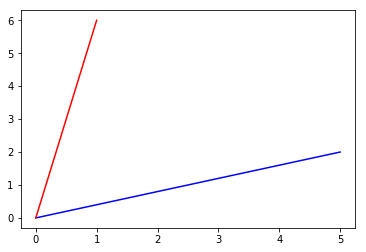

In [119]:
plot_vectors(a)

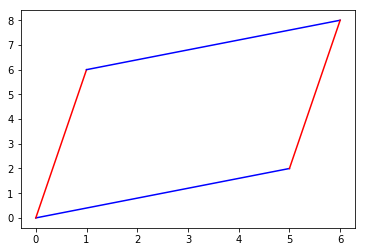

In [120]:
plot_square(a)

**1D**

In [121]:
a = np.array([[5]])
print(np.linalg.det(a),np.linalg.matrix_rank(a))

5.0 1


**3D**

In [122]:
a = np.array([[5, 2, 1],
              [1, 6, 1],
              [1, 2, 3]])
print(np.linalg.det(a),np.linalg.matrix_rank(a))

72.0 3


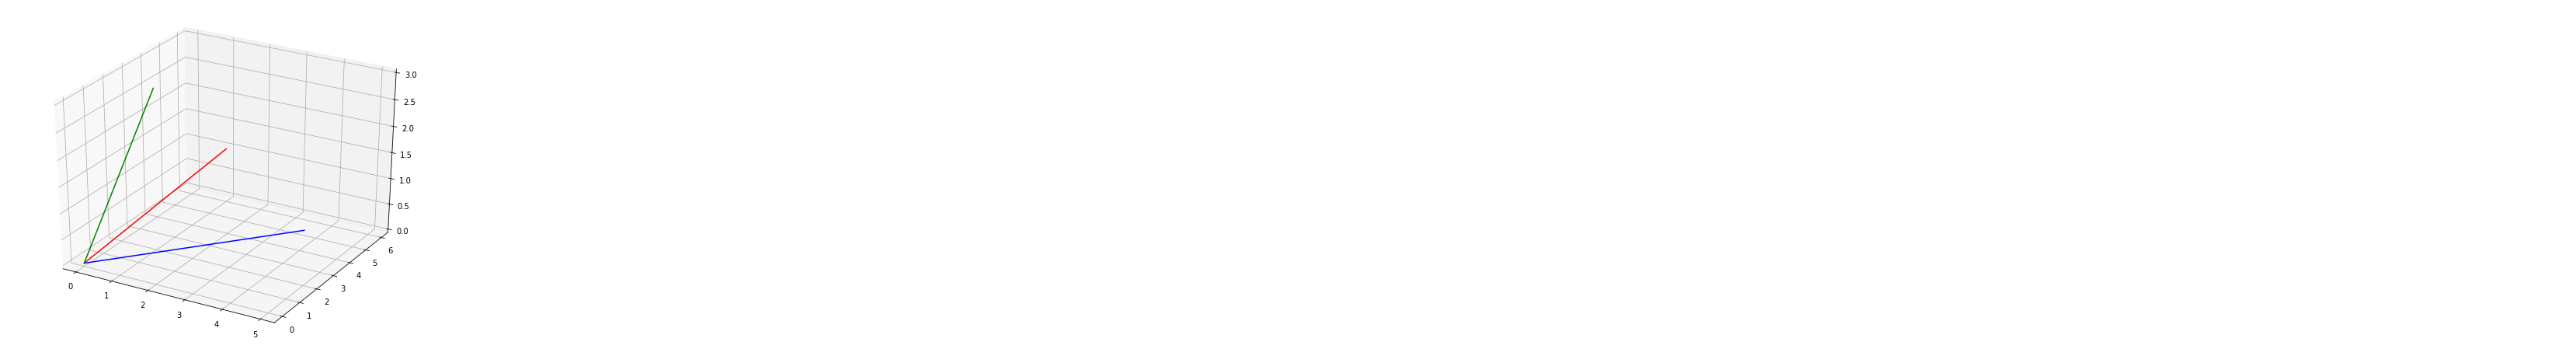

In [123]:
plot_vectors_in_3D(a)

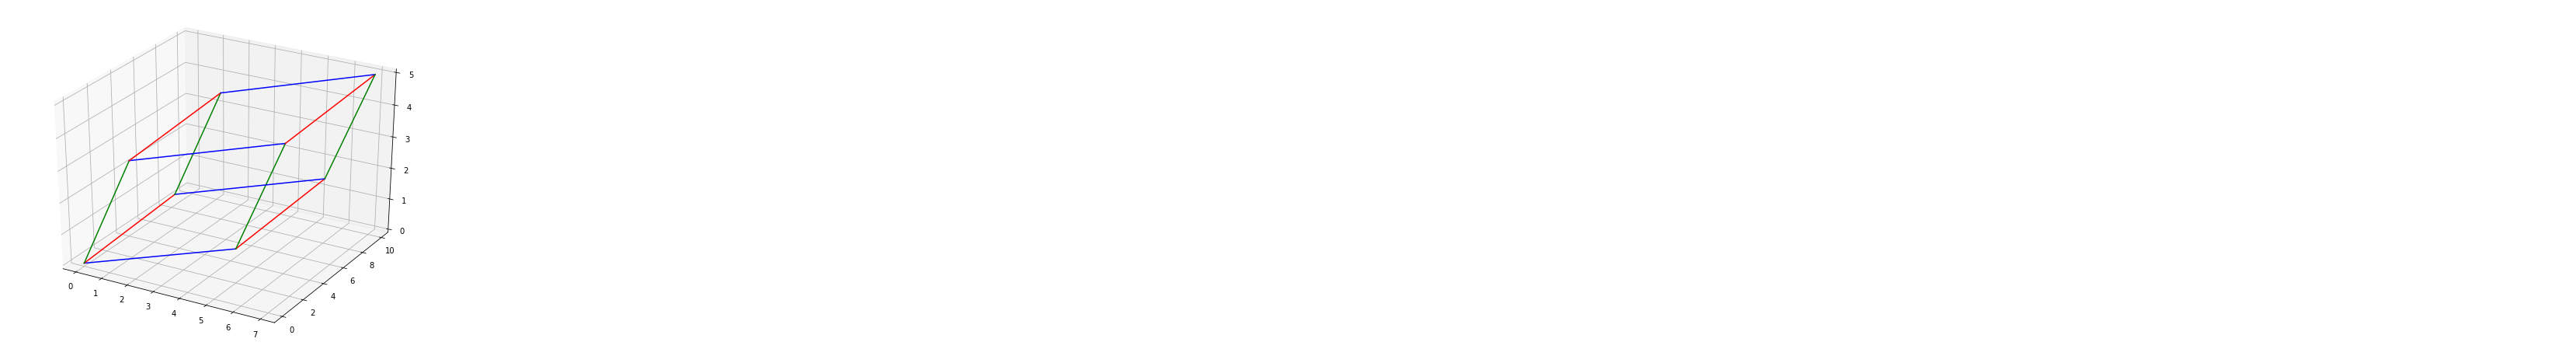

In [124]:
plot_square_in_3D(a)

**Rank less than the number of measurements**

**2D**

In [125]:
a = np.array([[5, 10],
              [1, 2]])
print(np.linalg.det(a),np.linalg.matrix_rank(a))

-5.55111512313e-16 1


In [126]:
np.linalg.inv(a)

array([[ -3.60287970e+15,   1.80143985e+16],
       [  1.80143985e+15,  -9.00719925e+15]])

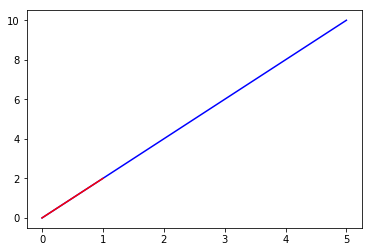

In [127]:
plot_vectors(a)

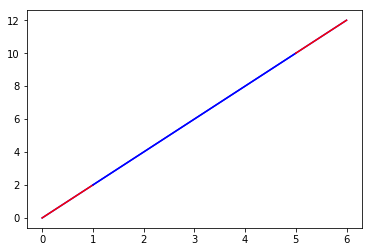

In [128]:
plot_square(a)

**3D**

In [129]:
a = np.array([[5, 10, 20],
              [1, 2, 4],
              [2, 2, 2]])
print(np.linalg.det(a), np.linalg.matrix_rank(a))

1.11022302463e-15 2


In [130]:
np.linalg.inv(a)

array([[ -3.60287970e+15,   1.80143985e+16,   0.00000000e+00],
       [  5.40431955e+15,  -2.70215978e+16,   1.00000000e+00],
       [ -1.80143985e+15,   9.00719925e+15,  -5.00000000e-01]])

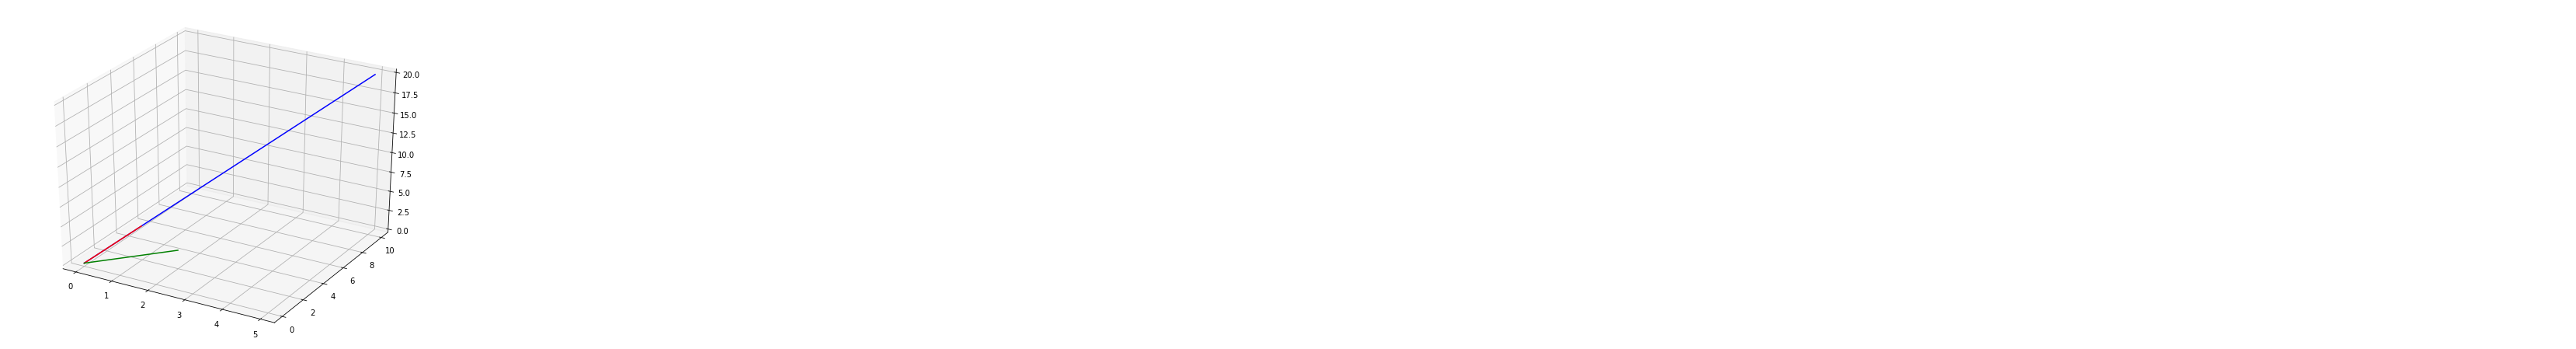

In [131]:
plot_vectors_in_3D(a)

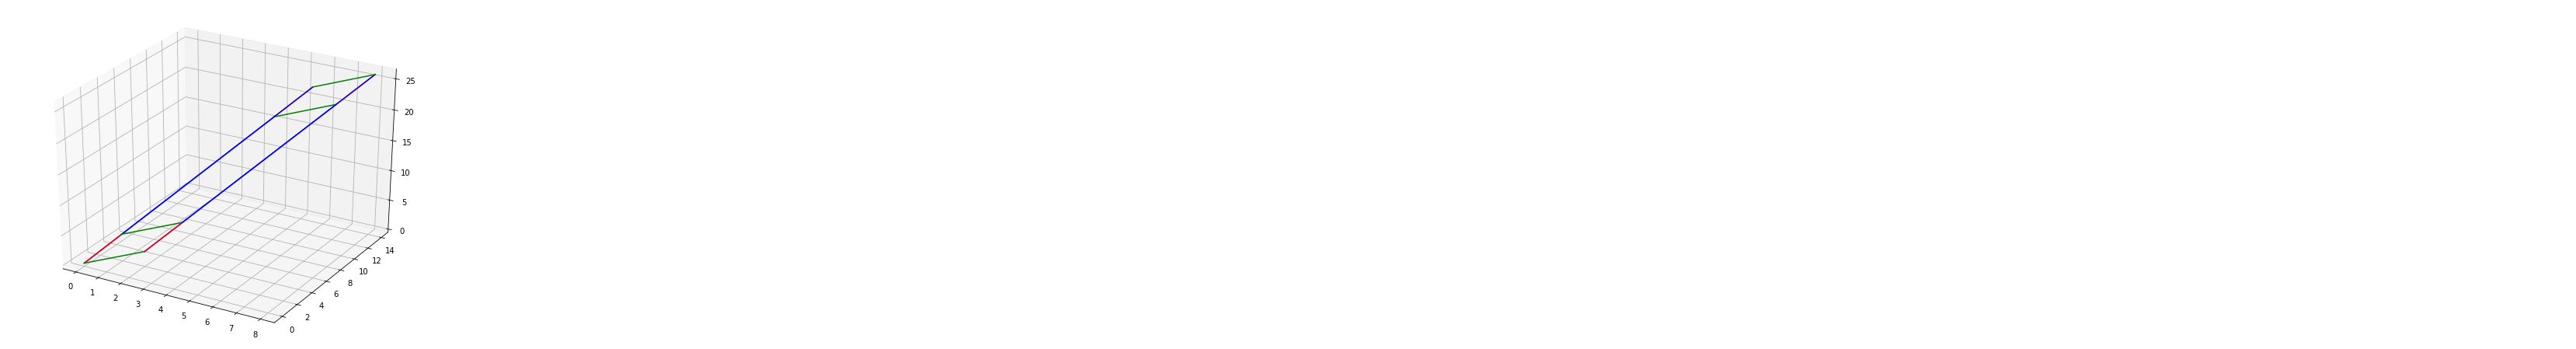

In [132]:
plot_square_in_3D(a)